<b> Functions <b>

In [1]:
from qutip import *
import pylab as py
import numpy as np
import matplotlib.pyplot as plt


def heaviside(x):
    if x >= 0 :
        return 1
    if x < 0 :
        return 0
    


<b> Parameters <b>

In [2]:

N = 4      # number of cavity fock states (N-1 photons inn the cavity)
Np = 2 # qubit's levels
n_th_a = 0.0           # temperature in frequency units



#time settings
ti = 0 #initial time
tf = 10**(-9)*300 #final time
steps = 6001 #number of steps
tau_list = np.linspace(ti,tf,steps) # vector of time steps

# CYCLES FOR FREQUENCY SCAN
cycles = 101 # number of variations of parameters
pi = 3/4
pf = 5/4
par_list = np.linspace(pi,pf,cycles)
par_range = [0 for i in range(cycles)]

print(par_list)
print('time step:', (tf-ti)/steps)

[0.75  0.755 0.76  0.765 0.77  0.775 0.78  0.785 0.79  0.795 0.8   0.805
 0.81  0.815 0.82  0.825 0.83  0.835 0.84  0.845 0.85  0.855 0.86  0.865
 0.87  0.875 0.88  0.885 0.89  0.895 0.9   0.905 0.91  0.915 0.92  0.925
 0.93  0.935 0.94  0.945 0.95  0.955 0.96  0.965 0.97  0.975 0.98  0.985
 0.99  0.995 1.    1.005 1.01  1.015 1.02  1.025 1.03  1.035 1.04  1.045
 1.05  1.055 1.06  1.065 1.07  1.075 1.08  1.085 1.09  1.095 1.1   1.105
 1.11  1.115 1.12  1.125 1.13  1.135 1.14  1.145 1.15  1.155 1.16  1.165
 1.17  1.175 1.18  1.185 1.19  1.195 1.2   1.205 1.21  1.215 1.22  1.225
 1.23  1.235 1.24  1.245 1.25 ]
time step: 4.999166805532412e-11


In [5]:
# parameters

h = 1.0545718*10**(-34)
e = 1.60217662*10**(-19)

C = 102*10**(-15)
Cq = 60*10**(-15)
L = 5*10**(-9)

k = 9
Ej_q = 2*np.pi*h*10*10**9
Ej_sum = 2*np.pi*h*160*10**9
Ej_diff = 0.02*Ej_sum
Ec = e**2/(2*Cq+C)



def phi_x(omega, time):
    return k*np.pi/2*(1/2 - 1/2*np.cos(omega*time))
#     return k*np.pi/2*(heaviside(np.cos(omega*time +3/2*np.pi)))

def eta(omega, time):
    return Ej_sum*L*(2*e/h)**2*np.cos(phi_x(omega, time)/k)/(2*k)

def Ej_q_s(omega, time):
    return Ej_q + (2*e/h)**-2*(1+eta(omega,time))/(2*L)
    
def wq(omega,time):
    return np.sqrt(8*Ec*Ej_q_s(omega,time))/h

def an_q(omega, time):
    return -Ec*(Ej_q + (2*e/h)**-2*(eta(omega,time))/(8*k**2*L))/(h*Ej_q_s(omega,time))
    
def wa(omega, time):
    return wq(omega, time) + an_q(omega, time)

def wr(omega, time):
    return np.sqrt((1+eta(omega, time))/(L*C))

def an_r(omega, time):
    return -(2*e/h)**2*12*h*eta(omega, time)/(192*k**2*C*(1+eta(omega, time)))
                                             
def wc(omega, time):
    return wr(omega, time) + an_r(omega, time)

def coeff_4(omega,time):
    return -(Ec/(12*(h/(2*np.pi))*Ej_q_s(omega, time)))*(Ej_q + ((h/(4*e*np.pi))**2)*(eta(omega, time)/(8*(k**2)*L)) )

def gxx(omega,time): 
    return np.cos(phi_x(omega,time)/k)*Ej_diff/(2*k*np.sqrt(h))*(2*Ec/Ej_q_s(omega,time))**(1./4)*(e/h)*(L/C*(1/(1+eta(omega,time))))**(1./4) # transverse coupling strength

def gzx(omega,time): 
    return -np.sin(phi_x(omega,time)/k)*Ej_sum/(8*k**2*np.sqrt(h))*(2*Ec/Ej_q_s(omega,time))**(1./2)*(e/h)*(L/C*(1/(1+eta(omega,time))))**(1./4) # longitudinal coupling strength

def gxz(omega,time): 
    return -np.sin(phi_x(omega,time)/k)*Ej_diff/(4*k**2)*(2*Ec/Ej_q_s(omega,time))**(1./4)*(e/h)**2*(L/C*(1/(1+eta(omega,time))))**(1./2) # competing longitudinal coupling strength

def gzz(omega,time): 
    return -np.cos(phi_x(omega,time)/k)*Ej_sum/(16*k**3)*(2*Ec/Ej_q_s(omega,time))**(1./2)*(e/h)**2*(L/C*(1/(1+eta(omega,time))))**(1./2) # competing transverse coupling strength


# wd = 1.0072*.992*1.002*1.04*.97097977*((wr(0,0)+wr(np.pi,1))/2 + (wa(0,0)+wa(np.pi,1))/2) # multilevel sin

wd = .97097977*((wr(0,0)+wr(np.pi,1))/2 + (wa(0,0)+wa(np.pi,1))/2) # multilevel square wave

print(Ej_q_s(wd,0)/h*10**-9)
print('frequency of switching',wd/(2*np.pi)*10**-9)
print('time of switching',1/(wd/(2*np.pi)))

print('max cavity frequency',((wr(0,0)))/(2*np.pi)*10**-9)
print('min cavity frequency',((wr(np.pi,1)))/(2*np.pi)*10**-9)
print('average cavity frequency',((wr(0,0)+wr(np.pi,1))/2)/(2*np.pi)*10**-9)

print('max qubit frequency',((wa(0,0)))/(2*np.pi)*10**-9)
print('min qubit frequency',((wa(np.pi,1)))/(2*np.pi)*10**-9)
print('average qubit frequency',((wa(0,0)+wa(np.pi,1))/2)/(2*np.pi)*10**-9)

print('max gxx coupling',((gxx(0,0)))/(2*np.pi)*10**-6)
print('min gxx coupling',((gxx(np.pi,1)))/(2*np.pi)*10**-6)

print('max gzx coupling',((gzx(0,0)))/(2*np.pi)*10**-6)
print('min gzx coupling',((gzx(np.pi,1)))/(2*np.pi)*10**-6)

print('max gxz coupling',((gxz(0,0)))/(2*np.pi)*10**-6)
print('min gxz coupling',((gxz(np.pi,1)))/(2*np.pi)*10**-6)

print('max gzz coupling',((gzz(0,0)))/(2*np.pi)*10**-6)
print('min gzz coupling',((gzz(np.pi,1)))/(2*np.pi)*10**-6)



193.46301873572963
frequency of switching 13.347856041396886
time of switching 7.491839864758893e-11
max cavity frequency 7.948052980747641
min cavity frequency 7.047499335473463
average cavity frequency 7.497776158110551
max qubit frequency 6.499563782306502
min qubit frequency 5.998466062091224
average qubit frequency 6.249014922198863
max gxx coupling 12.680468843163066
min gxx coupling 8.573422963001772e-16
max gzx coupling -0.0
min gzx coupling -6.59738831175196
max gxz coupling -0.0
min gxz coupling -0.18057834144462423
max gzz coupling -0.06978918840383212
min gzz coupling -5.210089321044311e-18


<b> Numerical solution <b>

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


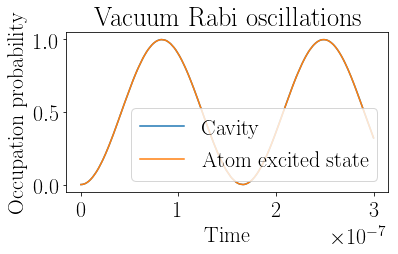

In [31]:
p_ex_qub = np.zeros(steps) #stores prob of ex of qubit
p_ex_res = np.zeros(steps) #stores prob of ex of resonator


   # intial state (ground state)
psi0 = tensor(basis(N,0), basis(Np,0))    # start with qubit and photons in the ground state



# operators
a  = tensor(destroy(N), qeye(Np)) #destroy cavity photon
sm1 = tensor(qeye(N), destroy(Np)) #destroy atom1 excitation
iden = tensor(qeye(N), qeye(Np)) #identity


#list of collapse operator (dissipation ops) for separate baths (for Lindblad's equation)    
c_op_list = []




#Rabi model Hamiltonian for two atoms and a cavity mode for time dependent coupling

# high freq modulation
def H1_coeff(t,args):

    return gxx(wd_s,t)

def H2_coeff(t,args):

    return gzz(wd_s,t)

def H3_coeff(t,args):

    return gzx(wd_s,t)

def H4_coeff(t,args):

    return gxz(wd_s,t)

def Hc_coeff(t,args):

    return wr(wd_s,t)

def Ha_coeff(t,args):

    return wa(wd_s,t)

#     def Hana_coeff(t,args):

#         return coeff_4(wd_s,t)




H1 = (sm1 + sm1.dag())*(a + a.dag())

H2 = (2*sm1.dag()*sm1 - iden)*(a +a.dag() )*(a +a.dag() )

H3 = (2*sm1.dag()*sm1 - iden)*(a + a.dag())

H4 = (sm1 + sm1.dag())*(a + a.dag())*(a + a.dag())

Hc = (a.dag()*a)

Ha = (2*sm1.dag()*sm1 - iden)/2

#     Hana = (sm1 +sm1.dag())*(sm1 +sm1.dag())*(sm1 +sm1.dag())*(sm1 +sm1.dag())

H = [[Hc,Hc_coeff],[Ha,Ha_coeff],[H1,H1_coeff],[H2,H2_coeff],[H3,H3_coeff],[H4,H4_coeff]]


#solve schrodinger equation
output = mesolve(H, psi0, tau_list, c_op_list ,[a.dag() * a, sm1.dag() * sm1])  #stores expectation values of number of phontons, excitation of atom 1 and 2 



# plot excitation probabilities of photons and qubit
plt.plot(tau_list, output.expect[0], label="Cavity")
plt.plot(tau_list, output.expect[1], label="Atom excited state")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Occupation probability')
plt.title('Vacuum Rabi oscillations');
plt.show() 


p_ex_res[:] = output.expect[0]  # stores result of time evolution of prob of ex of photon for the specific driving freq
p_ex_qub[:] = output.expect[1]  # stores result of time evolution of prob of ex of qubit for the specific driving freq



np.save('output_resonator', p_ex_res)
np.save('output_qubit', p_ex_qub)



/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


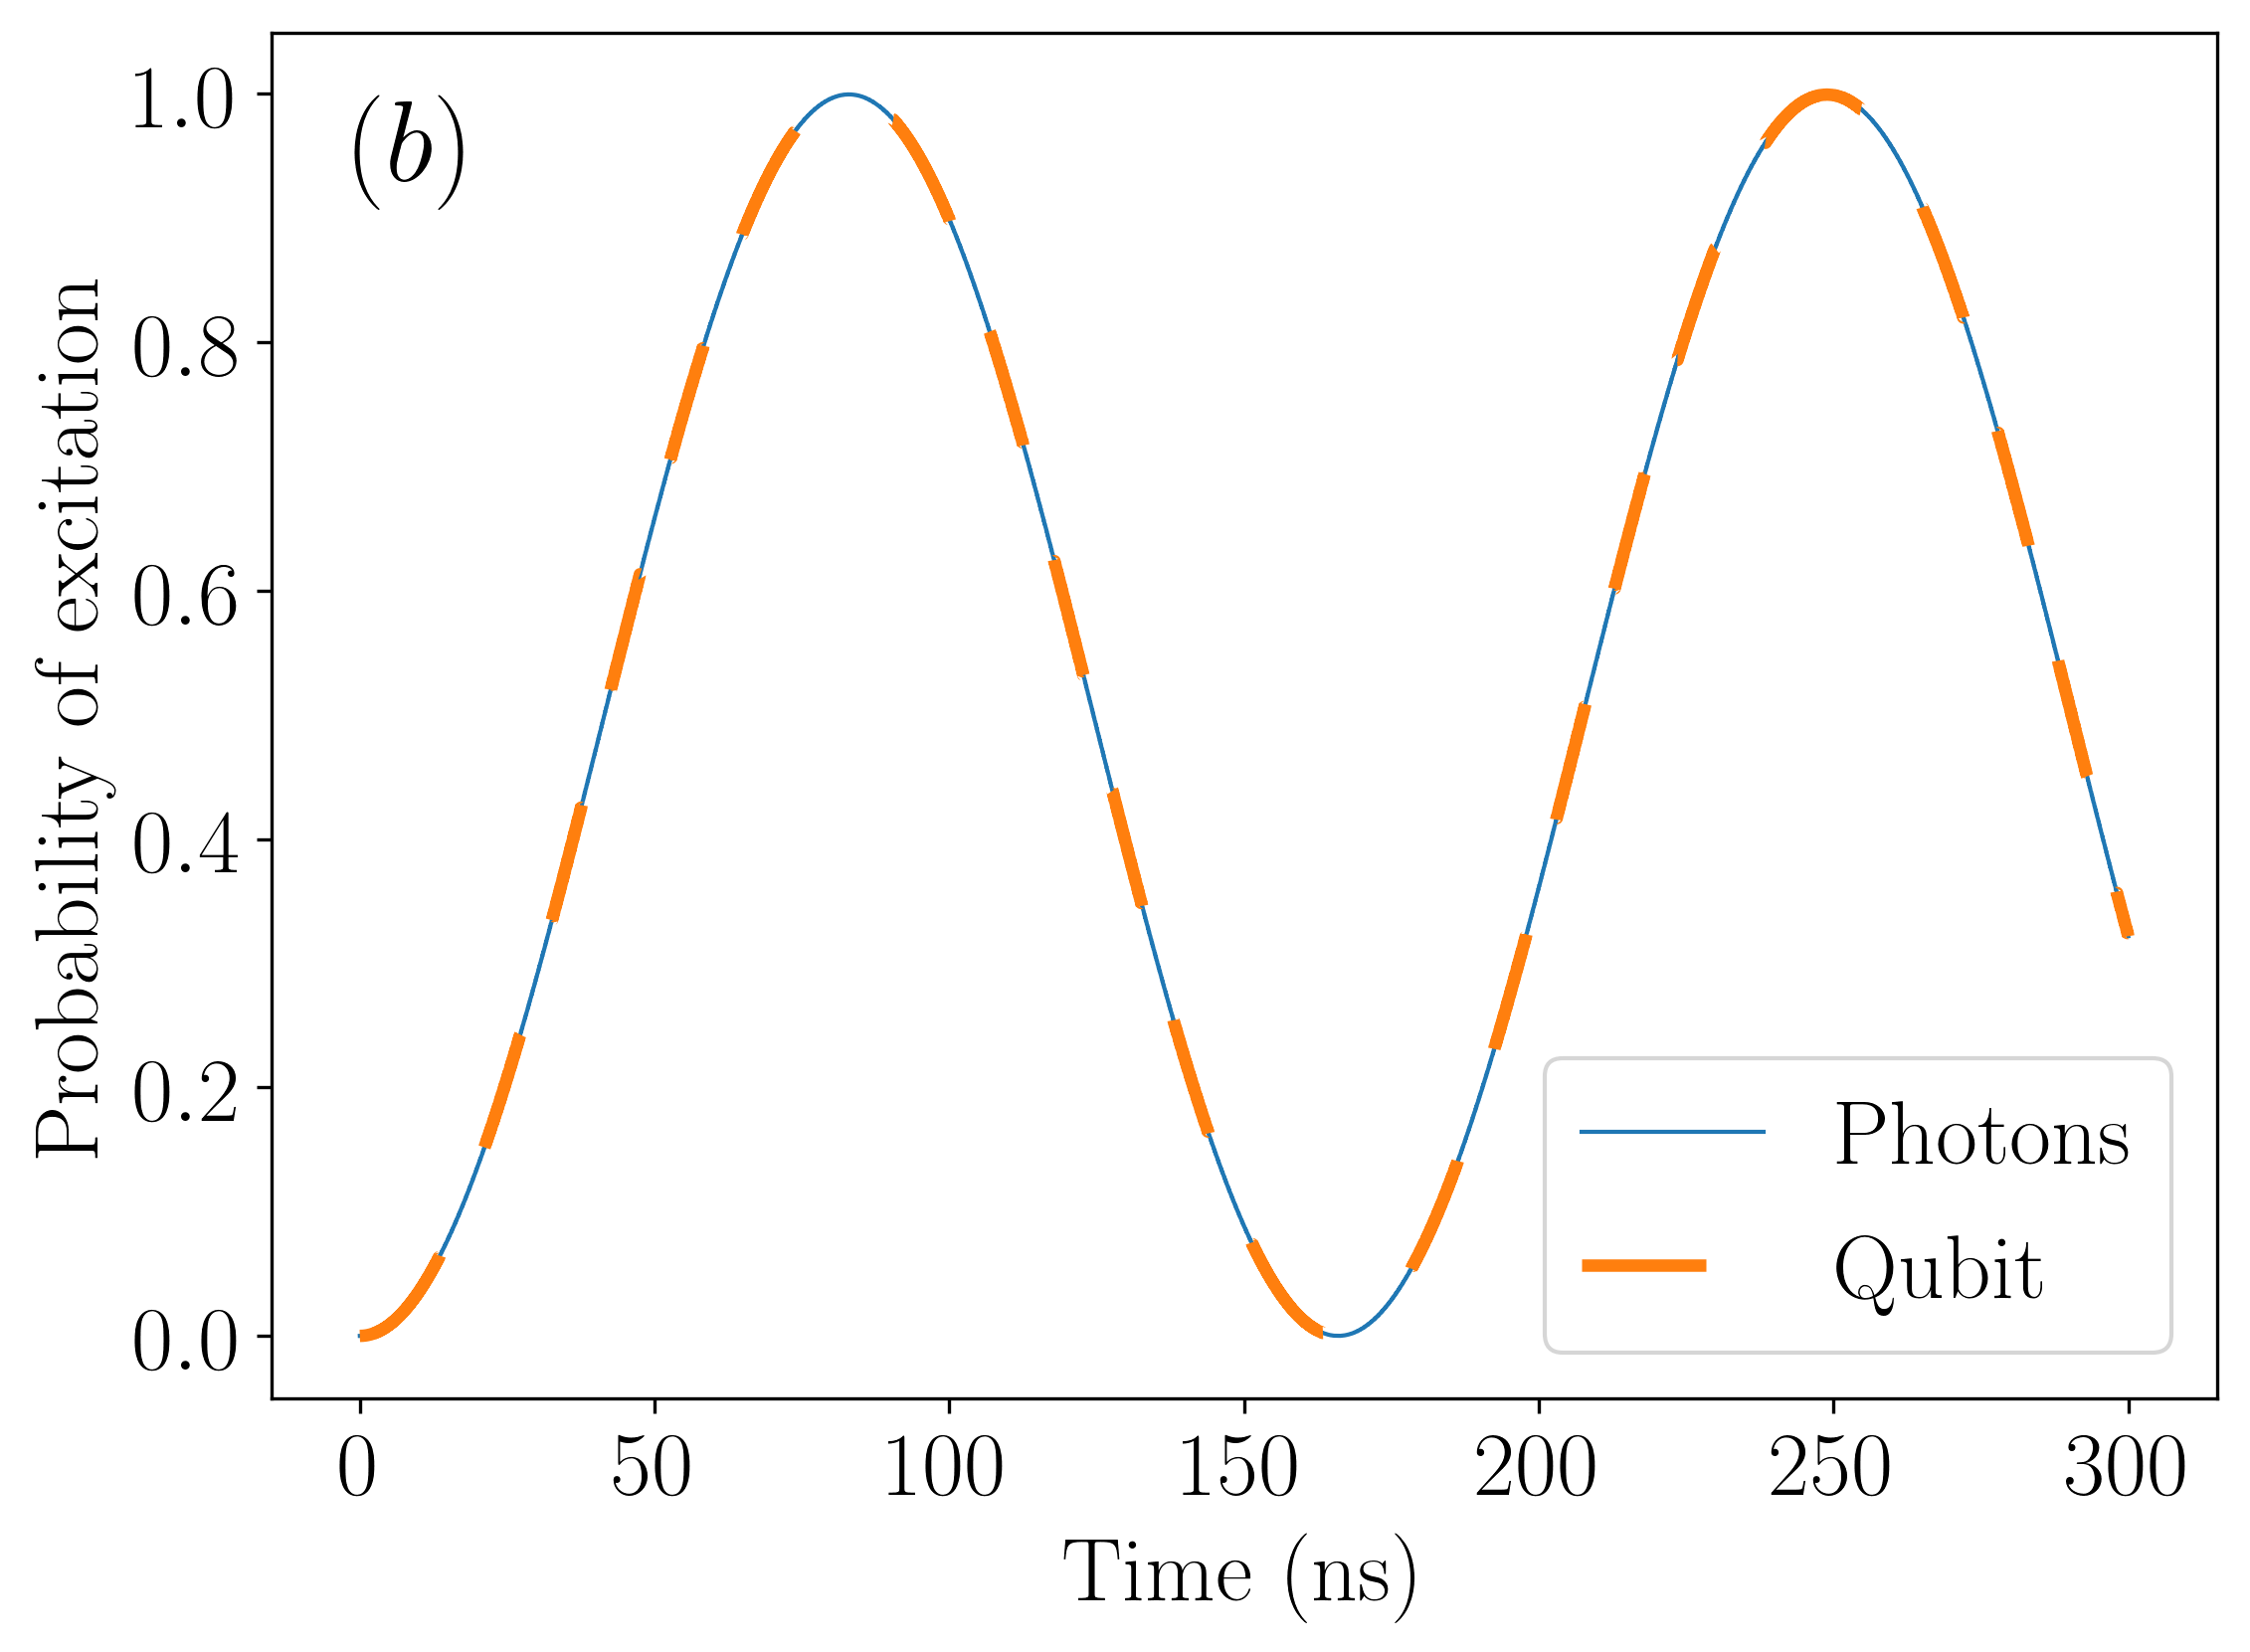

In [32]:
#changes plot parameters
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.autolayout': True})
# matplotlib.rcParams['mathtext.rm'] = 'Arial'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



#compare analytical and numerical results for the concurrence

# c_an = np.load("data/conc_ana_2q_num_an.npy")
# c = np.load("data/conc_avg_2q_num_an.npy")
# c_2 = np.load("data/conc_dyn_2q_num_an.npy")

plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.plot(tau_list*10**9, output.expect[0],linewidth=1, label="Photons")
plt.plot(tau_list*10**9, output.expect[1],linewidth=3,dashes=[10, 10], label="Qubit")
plt.xlabel(r' Time (ns)', fontsize = 22)
plt.ylabel(r' Probability of excitation ', fontsize = 22)
plt.legend(loc='best')
plt.text(10,1,r'$(b)$', fontsize = '28', color='black', horizontalalignment='center',verticalalignment='top',multialignment='center')

# ymin = -0.1*10**(-6)
# ymax = 1.05*10**(-6)
# plt.ylim((ymin,ymax)) # sets limit for y-axis

# locs, labels = plt.yticks()
# labels = [str(round(e,2)) for e in locs if e >= 0]#locs
# locs = [e for e in locs if e>=0]
# plt.yticks(locs, labels)

plt.savefig('p_ex_wc-wa.eps', dpi = 300)
plt.show()


